# Salaries Dataset

Analyzing this dataset as an exercise. 

In [35]:
import pandas as pd
import numpy as np

## Big Picture

let's pretend we want to use this dataset to predict the salary of new software developers the model hasn't seen yet. This will be used as part of a service that tells individuals what they are likely to make at their job offer. at time of inference we will not have the rating necessarily, but we will have the company name and the job title.

In [36]:
software_salaries = pd.read_csv('datasets/archive/Software_Professional_Salaries.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/archive/Software_Professional_Salaries.csv'

In [ ]:
software_salaries.head

<bound method NDFrame.head of        Rating                      Company Name                 Job Title  \
0         3.8                            Sasken         Android Developer   
1         4.5  Advanced Millennium Technologies         Android Developer   
2         4.0                         Unacademy         Android Developer   
3         3.8                SnapBizz Cloudtech         Android Developer   
4         4.4            Appoids Tech Solutions         Android Developer   
...       ...                               ...                       ...   
22769     4.7                  Expert Solutions             Web Developer   
22770     4.0           Nextgen Innovation Labs             Web Developer   
22771     4.1                           Fresher  Full Stack Web Developer   
22772     4.1                         Accenture  Full Stack Web Developer   
22773     3.8                   Thomson Reuters   Associate Web Developer   

        Salary  Salaries Reported   Location 

In [ ]:
software_salaries.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location'],
      dtype='object')

In [ ]:
software_salaries.describe()

,Rating,Salary,Salaries Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [ ]:
software_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22774 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
software_salaries["Company Name"].value_counts()

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
Talent Anywhere                     1
WisdmLabs                           1
Softdel                             1
Dentsu                              1
Nextgen Innovation Labs             1
Name: Company Name, Length: 11263, dtype: int64

ok, so we have 11263 different company names to choose from. making this a categorical attribute is possible. it is not ordinal so one hot encoding seems to make sense here. otherwhise we don't have a numerical representation of the text

In [37]:
software_salaries["Job Title"].value_counts()

Software Development Engineer          2351
Android Developer                      2029
Software Development Engineer (SDE)    1614
Front End Developer                    1412
Test Engineer                          1314
                                       ... 
Java and J2EE Developer                   1
Techlead Java                             1
Java Andriod Developer                    1
Java Deceloper                            1
Associate Web Developer                   1
Name: Job Title, Length: 1084, dtype: int64

This could also be categorical, however, it would be nice to create umbrellas for some of these to fall into given more time.

In [38]:
software_salaries["Location"]

0        Bangalore
1        Bangalore
2        Bangalore
3        Bangalore
4        Bangalore
           ...    
22769    Bangalore
22770    Bangalore
22771    Bangalore
22772    Bangalore
22773    Bangalore
Name: Location, Length: 22774, dtype: object

In [39]:
# not categorical but this shows us that there are many values in the tenths range but everyt looks to be rounded to the nearest tenth
software_salaries["Rating"].value_counts()

4.00    2895
3.90    2474
3.80    2471
4.10    2112
3.70    1479
4.20    1323
4.30    1294
3.60    1010
4.40     883
4.50     861
3.50     801
3.30     727
5.00     672
3.40     574
4.60     464
4.70     401
3.00     333
3.10     329
3.20     316
4.80     283
2.90     177
4.90     158
2.80     129
2.70      98
2.60      77
1.00      67
2.50      66
2.00      54
2.40      53
2.30      43
2.20      43
3.95      27
2.10      15
1.90      15
1.80      12
3.85      11
1.50       8
1.60       8
1.40       5
1.70       4
1.30       2
Name: Rating, dtype: int64

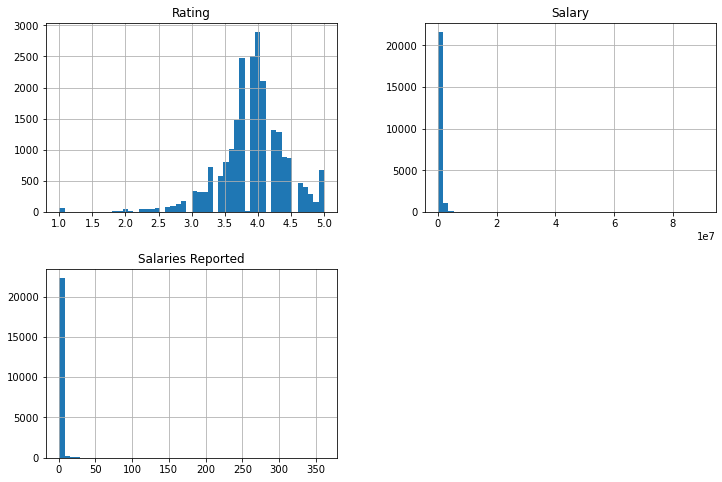

In [40]:
import matplotlib.pyplot as plt

software_salaries.hist(bins=50, figsize=(12,8))
plt.show()

array([[<AxesSubplot:xlabel='Rating', ylabel='Rating'>,
        <AxesSubplot:xlabel='Salary', ylabel='Rating'>,
        <AxesSubplot:xlabel='Salaries Reported', ylabel='Rating'>],
       [<AxesSubplot:xlabel='Rating', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salary'>,
        <AxesSubplot:xlabel='Salaries Reported', ylabel='Salary'>],
       [<AxesSubplot:xlabel='Rating', ylabel='Salaries Reported'>,
        <AxesSubplot:xlabel='Salary', ylabel='Salaries Reported'>,
        <AxesSubplot:xlabel='Salaries Reported', ylabel='Salaries Reported'>]],
      dtype=object)

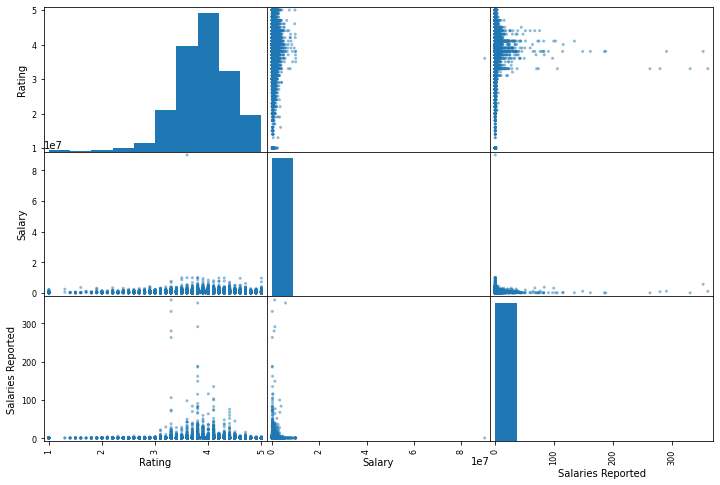

In [41]:
from pandas.plotting import scatter_matrix

attributes = ["Rating", "Salary", "Salaries Reported"]
scatter_matrix(software_salaries[attributes], figsize=(12,8))

### Stop and do test set
did a few steps more becausae I just don't have as clear of an idea of the data anyway so I'm not biasing myself that much so far. 

need to remmber here, using train_test_split is ok with random_state seed when you know the training dataset will stay constant, but you would loose reproducability if you were to add additional observations or remove them, as the seed only works with the same initial dataset. 

in this case I'm going to pretend that we will need to accomodate new salary information for future training and we would like to ensure that the same data ends up in the training set and the test set each time. This will be bad because it mixes in your test set with your training set over time and your really want to keep them separated. 



In [42]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return(crc32(np.int64(identifier)) < test_ratio * 2**32)

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [43]:
# there is no id column in this dataset and no natural identifier either
software_salaries_with_id = software_salaries.reset_index()


In [44]:
train_set, test_set = split_data_with_id_hash(software_salaries_with_id, .2, "index")

In [45]:
train_set.head()

,index,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
3,3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore
6,6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore


In [46]:
test_set.head()

,index,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
2,2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
5,5,4.2,Freelancer,Android Developer,100000,3,Bangalore
12,12,3.7,Wibmo,Android Developer,900000,2,Bangalore
16,16,3.6,Novopay Solutions,Android Developer,600000,2,Bangalore
23,23,4.4,eSecForte Technologies,Android Developer,228000,2,Bangalore


now train and test are split, ignore test set until validation time


In [47]:
salaries = train_set

In [50]:
# representative sampling attempt
salaries["Rating_Cat"] = pd.cut(salaries["Rating"], bins=[0., 1, 2, 3, 4, 5], labels=[0,1,2,3,4])

/tmp/ipykernel_6644/328645916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries["Rating_Cat"] = pd.cut(salaries["Rating"], bins=[0., 1, 2, 3, 4, 5], labels=[0,1,2,3,4])


In [51]:
salaries.head()


,index,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Rating_Cat
0,0,3.8,Sasken,Android Developer,400000,3,Bangalore,3
1,1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,4
3,3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,3
4,4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,4
6,6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore,3


Text(0, 0.5, 'Number of Records')

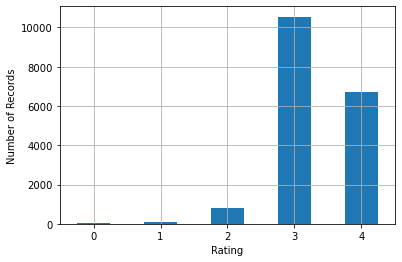

In [52]:
salaries["Rating_Cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Rating")
plt.ylabel("Number of Records")

ok, so a good TODO here would be to do stratified sampling on the rating category as an exercise, though I doubt that what the employee rates the company is the best predictor of their current salary, and it may not even be available at inference time for new records, but it's my hypothetical and I can do what I want. 